# Rayleigh-Bénard convection of a Darcy fluid in a porous annulus


$$
\begin{cases}
\mathbb{S}=
\mathcal{L} = \mathcal{L}_\Omega & \text{scaling with annulus size and convective speed} \\
\mathcal{U} = K_{\text{ref}}\,g\Delta\rho/\mu_{\text{ref}} \\
\mathcal{T} = \phi_{\text{ref}}\mathcal{L}/\mathcal{U} \\
\Omega = \Omega = \{(x, y)~:~R_{\text{inner}}^2 < x^2 + y^2 < R_{\text{outer}}^2\} & R_{\text{inner}}, R_{\text{outer}}=\mathcal{O}(1) \\
\partial\Omega_{\text{inner}} = \{(x, y)~:~ x^2 + y^2 = R_{\text{inner}}^2 \} \\
\partial\Omega_{\text{outer}} = \{(x, y)~:~ x^2 + y^2 = R_{\text{outer}}^2 \} \\
e_g^x = -\frac{x}{\sqrt{x^2+y^2}} & \text{gravity acting radially towards centre} \\ 
e_g^y = -\frac{y}{\sqrt{x^2+y^2}} \\
\phi = 1 & \text{constitutive relations} \\
\mathsf{D} = \mathsf{I} \\ 
\mathsf{K} = \mathsf{I}\\ 
\mu = 1 \\
\rho(c) = -c \\
c_0(x,y)=\frac{\ln(R_{\text{outer}}/\sqrt{x^2 + y^2})}{\ln(R_{\text{outer}}/R_{\text{inner}})}+\mathcal{N}(x,y) & \text{diffusive base state plus noise} \\
c_{\text{D}}\vert_{\partial\Omega_{\text{inner}}}=1 & \text{prescribed temperature on inner and outer boundaries} \\
c_{\text{D}}\vert_{\partial\Omega_{\text{outer}}}=0 \\
\psi_{\text{D}}\vert_{\partial\Omega}=0 & \text{no-penetration on entire boundary}
\end{cases}
$$

In [ ]:
from lucifex.fdm import AB2, CN
from lucifex.sim import run
from lucifex.utils import triangulation
from lucifex.viz import plot_colormap, plot_mesh
from lucifex.io import write

from py.darcy_convection_rayleigh_benard import darcy_convection_rayleigh_benard_annulus


Rinner = 1.0
Router = 2.0
simulation = darcy_convection_rayleigh_benard_annulus(
    Rinner=Rinner,
    Router=Router,
    Nradial=32,
    Ra=300.0, 
    c_eps=1e-3,  
    c_freq=6, 
    D_adv=AB2,
    D_diff=CN,
)

n_stop = 200
dt_init = 1e-6
n_init = 5
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

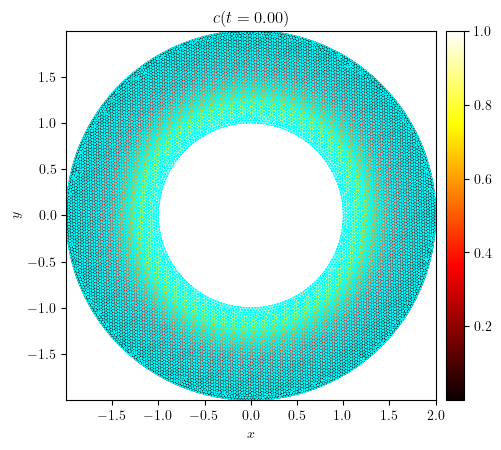

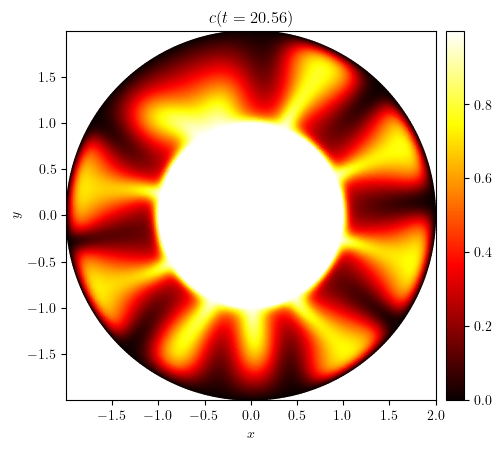

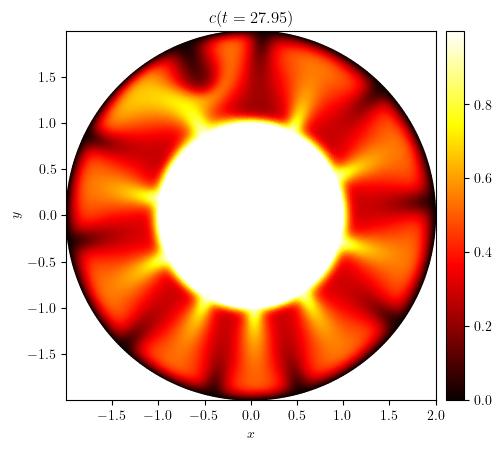

: 

In [ ]:
c = simulation['c']
mesh = c.function_space.mesh
mesh_tri = triangulation(mesh)
x, y = mesh_tri.x, mesh_tri.y

i_mid = int(0.5 * len(c.series))
time_indices = (0, i_mid,  -1)
for i in time_indices:
    c_tri = triangulation(c.series[i])
    fig, ax = plot_colormap(
        (mesh_tri, c_tri), 
        title=f'$c(t={c.time_series[i]:.2f})$',
        cartesian=False, 
    )
    if i == 0:
        plot_mesh(fig, ax, mesh, color='cyan', linewidth=0.5)
    write(
        fig, 
        f'A15c_rayleigh_benard_annulus_c(t={c.time_series[i]:.2f})', 
        './figures', 
        file_ext=['pdf', 'png'],
        close=False, 
        pickle=False,
    )